# Solving Boltzmann Equation

Eh, find a numerical technique to solve Boltzmann equation. Perhaps RK is a good candidate with leapfrog steps for any other variable.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45 as rk

%matplotlib widget

# The problem
The equation we are trying to solve is the following

\begin{cases}
M'&=-\frac{\Gamma}{aH}M & a\in[1,\infty)\\
R'&=\frac{\Gamma}{H}M& a\in[1,\infty)\\
H &= \sqrt{\frac{aM^2+R^2}{3a^4M_p^2}} & a\in [1,\infty)\\
R(1)&=0\\
M(1)&=1\\
\end{cases}

In [8]:
# Use this to integrate

# Create a vector with all the initial conditions
M_p     = 1
a_0     = 1
a_max   = 1e3
M_0     = 1
R_0     = 0
X_0     = np.array([M_0,R_0,np.sqrt((a_0 * M_0**2 + R_0**2)/(3*a_0**4*M_p))])
Gamma   = lambda a: 1
H       = lambda a,X: np.sqrt((a*X[0]**2 + X[1]**2)/(3 * a**4 * M_p))
N       = 100

# This solves the IVP Completely
def solve_ivp(a_0=a_0,a_max=a_max,X_0=X_0,Gamma=Gamma,H=H,N=N):

    # Create a function to do the step
    def F(a,X):
        return np.array([-Gamma(a)/(a*X[2]) * X[0], Gamma(a)/X[2] * X[0],H(a,X)])

    # Solve using beautiful Runge Kutta steps
    soln = rk(F,a_0,X_0,a_max,max_step=1e-1)

    # Retrive the solution
    a   = []
    X   = []

    for i in range(N):
        soln.step()
        a.append(soln.t)
        X.append(soln.y)

        if soln.status == 'finished': break

    a = np.array(a)
    X = np.array(X)

    return a,X

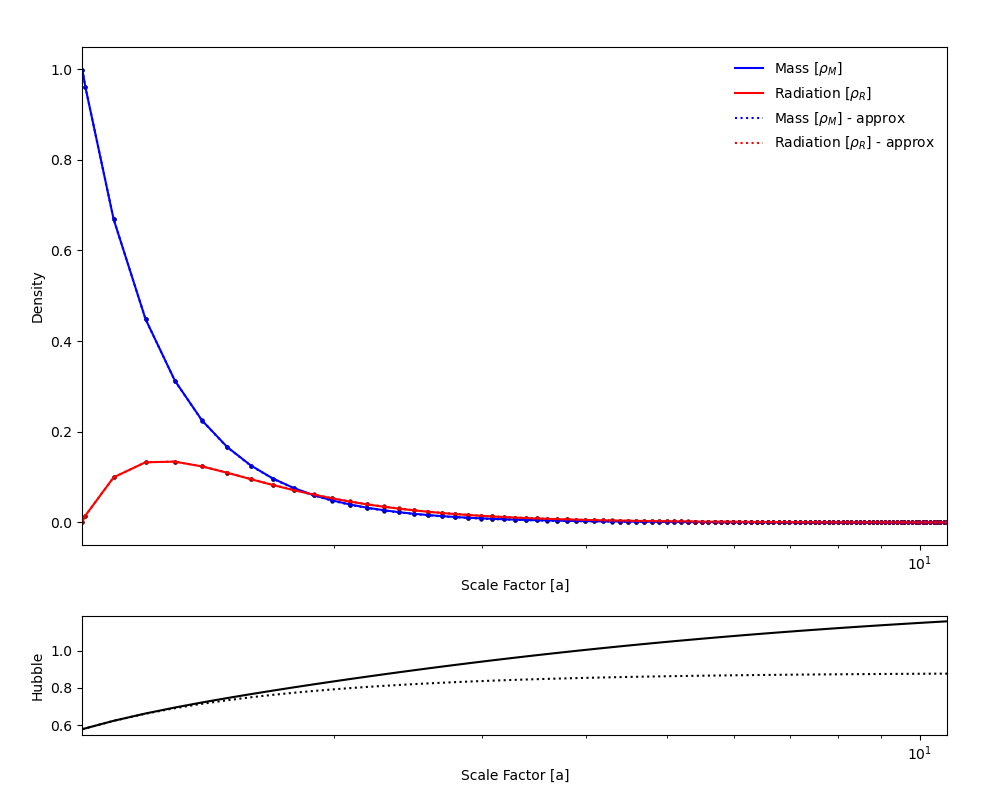

In [9]:


# Plot everything
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(4,1,(1,3))
ax2 = fig.add_subplot(4,1,4)
fig.tight_layout(pad=3)

# Plot M and R
# Get the numbers fo the correct H
a,X = solve_ivp()
ax1.plot(a,X.T[0]*(a[0]/a)**3,label = r'Mass [$\rho_M$]',c='b')
ax1.plot(a,X.T[1]*(a[0]/a)**4,label = r'Radiation [$\rho_R$]',c='r')
ax1.scatter(a,X.T[0]*(a[0]/a)**3,c='darkblue',s=10,lw=0)
ax1.scatter(a,X.T[1]*(a[0]/a)**4,c='darkred',s=10,lw=0)

# Plot Hubble's constant
ax2.plot(a,X.T[2],c='k')


# Get the numbers fo the correct approximate H
a,X = solve_ivp(H = lambda a,X: np.sqrt((a*X[0]**2 + 0*X[1]**2)/(3 * a**4 * M_p)))
ax1.plot(a,X.T[0]*(a[0]/a)**3,label = r'Mass [$\rho_M$] - approx',c='b',ls=':')
ax1.plot(a,X.T[1]*(a[0]/a)**4,label = r'Radiation [$\rho_R$] - approx',c='r',ls=':')
ax1.scatter(a,X.T[0]*(a[0]/a)**3,c='darkblue',s=10,lw=0)
ax1.scatter(a,X.T[1]*(a[0]/a)**4,c='darkred',s=10,lw=0)


# Plot Hubble's constant
ax2.plot(a,X.T[2],c='k',ls=':')

# Prettifications
ax1.set_xlabel('Scale Factor [a]')
ax2.set_xlabel('Scale Factor [a]')
ax1.set_ylabel('Density')
ax2.set_ylabel('Hubble')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlim(a[0],a[-1])
ax2.set_xlim(a[0],a[-1])
ax1.legend(frameon=False);

# Save the figure
fig.savefig('densities_approx.png')